In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import math
import warnings
from scipy.stats.stats import pearsonr
warnings.filterwarnings("ignore")

In [3]:
#Reading the data
data = pd.read_csv('datasets/data.csv')
pd.options.display.max_columns = None
data.dropna(inplace=True)
data.head()

,Playlist,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,artist_popularity,explicit,pop,rock,folk,mellow,indie,rap,house,r&b,stomp and holler,singer-songwriter,edm,quiet storm,contemporary,christmas,funk,metal,alternative,adult standards,americana,soul,blues,hip hop,motown,punk,disco,other,track_remast,track_live,track_feat,track_remix,track_radio,playlist_picks,playlist_top,playlist_find,time_sign_0.0,time_sign_3.0,time_sign_4.0,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,Followers
0,01WIu4Rst0xeZnTunWxUL7,0.774587,0.569892,1.203072e+06,0.384722,0.081271,0.289680,-17.368585,8.261538,0.574252,103.066446,0.594492,38.646154,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,26.0
1,056jpfChuMP5D1NMMaDXRR,0.036360,0.278167,3.307805e+05,0.938033,0.243068,0.409720,-6.676633,39.900000,0.155927,138.471733,0.238010,83.000000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5832.0
2,05dTMGk8MjnpQg3bKuoXcc,0.315539,0.622647,2.568210e+05,0.519294,0.015954,0.146851,-10.143137,29.588235,0.044953,114.938392,0.582373,59.627451,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,363.0
3,070FVPBKvfu6M5tf4I9rt2,0.278107,0.572167,2.738869e+05,0.661133,0.083647,0.213670,-8.181333,21.966667,0.070313,121.510900,0.648033,49.766667,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,87.0
4,08vPKM3pmoyF6crB2EtASQ,0.444162,0.566091,2.280894e+05,0.475788,0.042261,0.142679,-8.630303,39.333333,0.077973,121.517212,0.268758,58.030303,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,6808.0


## Feature Engineering Pipeline

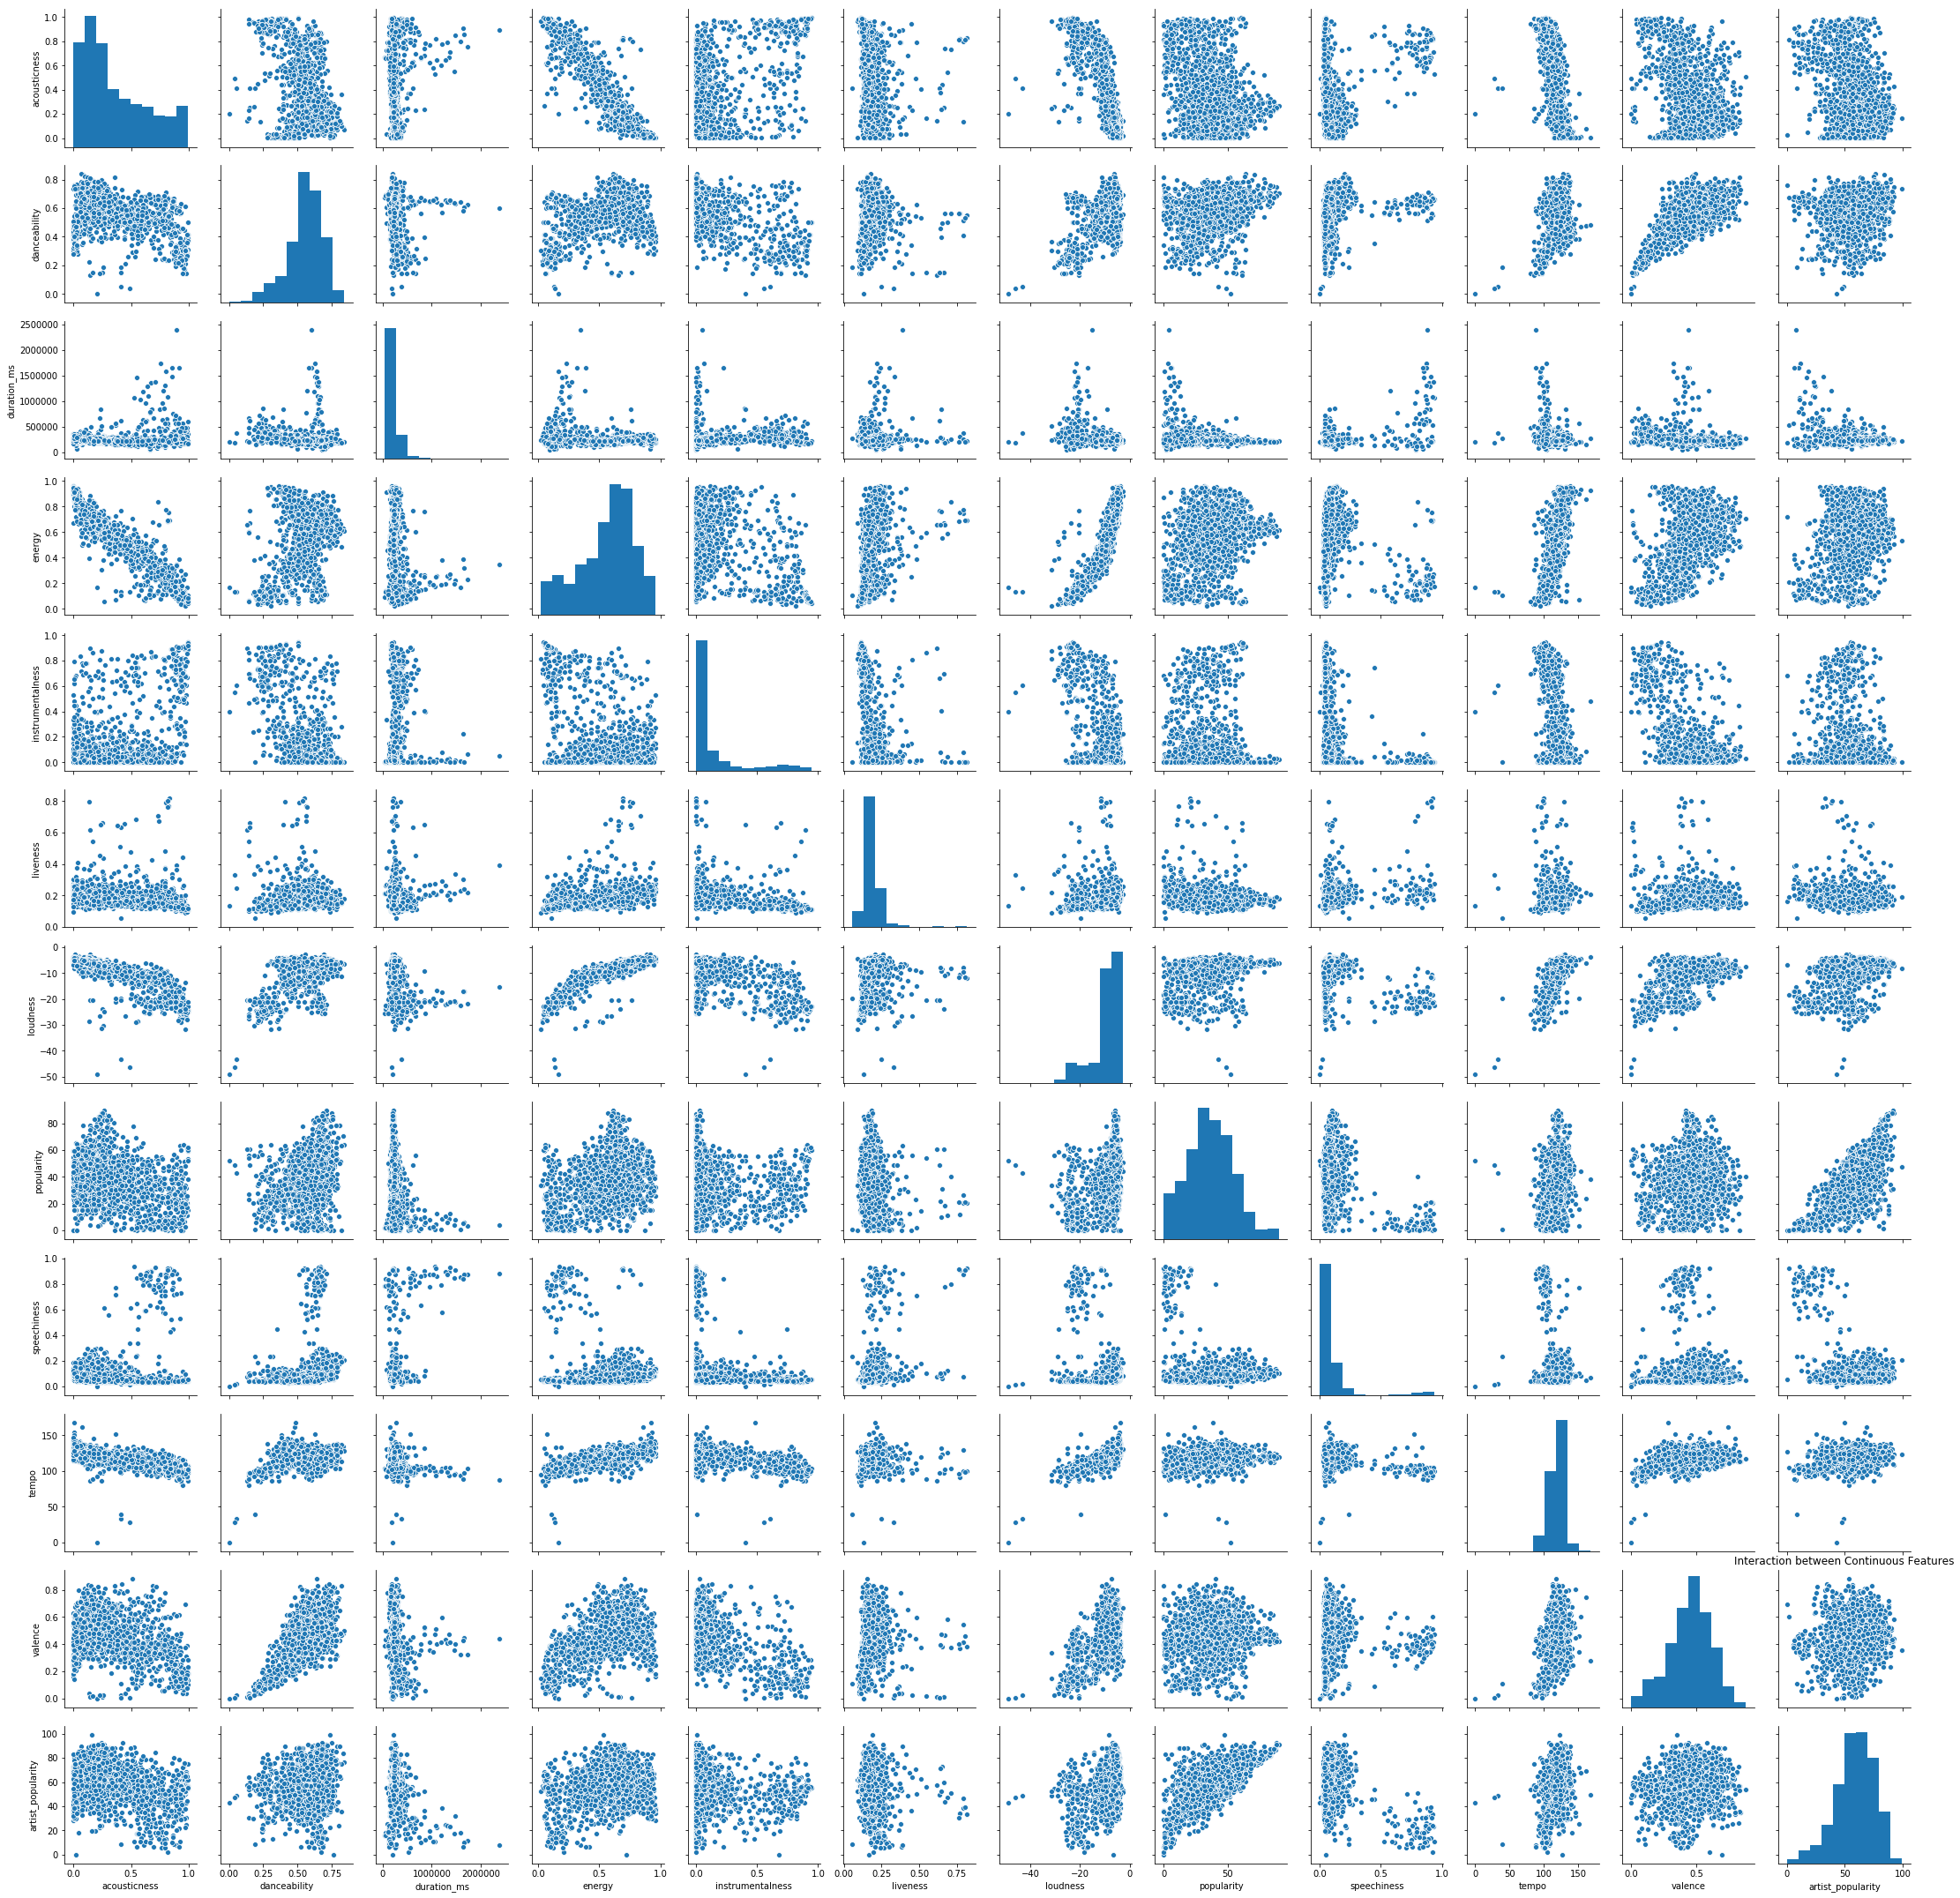

In [4]:
#Pairplot to see interaction between the features
continuous_features = ['acousticness', 'danceability', 
                           'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
                          'popularity', 'speechiness', 'tempo',
                            'valence', 'artist_popularity']
_ = sns.pairplot(data[continuous_features])
_ = plt.title("Interaction between Continuous Features")

In [5]:
# Calculting the interaction level and Adding interaction terms
i = 0
j = 1
while i < len(continuous_features):
    while j < len(continuous_features):
        if abs((pearsonr(data[continuous_features[i]], data[continuous_features[j]]))[0]) > 0.5:
            print(continuous_features[i] + "_" + continuous_features[j] + ":" + str(pearsonr(data[continuous_features[i]], data[continuous_features[j]])))
            data[continuous_features[i] + "_" + continuous_features[j]] = data[continuous_features[i]] * data[continuous_features[j]]
        j = j + 1
    i = i + 1
    j = i + 1

acousticness_energy:(-0.9253588918631058, 0.0)
acousticness_loudness:(-0.784806339491895, 7.8165440447453e-310)
acousticness_tempo:(-0.5920978597465147, 6.499062362814089e-141)
danceability_instrumentalness:(-0.547706006203247, 9.086167047616117e-117)
danceability_loudness:(0.5411832164771095, 1.6140848620922066e-113)
danceability_valence:(0.6708308386798935, 2.2385497491382546e-194)
energy_loudness:(0.8633878056187045, 0.0)
energy_tempo:(0.6454243968669466, 2.1712016712668164e-175)
energy_valence:(0.542237849716409, 4.868119858862971e-114)
instrumentalness_loudness:(-0.5948870770274683, 1.4731087564882876e-142)
instrumentalness_valence:(-0.5751266302456964, 3.032987118509297e-131)
loudness_tempo:(0.7191366687177994, 2.9900717588185486e-236)
loudness_valence:(0.5745277180931017, 6.498355588014141e-131)
popularity_artist_popularity:(0.6685671538572329, 1.3129976957113446e-192)


In [6]:
data.head()

,Playlist,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,artist_popularity,explicit,pop,rock,folk,mellow,indie,rap,house,r&b,stomp and holler,singer-songwriter,edm,quiet storm,contemporary,christmas,funk,metal,alternative,adult standards,americana,soul,blues,hip hop,motown,punk,disco,other,track_remast,track_live,track_feat,track_remix,track_radio,playlist_picks,playlist_top,playlist_find,time_sign_0.0,time_sign_3.0,time_sign_4.0,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,Followers,acousticness_energy,acousticness_loudness,acousticness_tempo,danceability_instrumentalness,danceability_loudness,danceability_valence,energy_loudness,energy_tempo,energy_valence,instrumentalness_loudness,instrumentalness_valence,loudness_tempo,loudness_valence,popularity_artist_popularity
0,01WIu4Rst0xeZnTunWxUL7,0.774587,0.569892,1.203072e+06,0.384722,0.081271,0.289680,-17.368585,8.261538,0.574252,103.066446,0.594492,38.646154,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,26.0,0.298000,-13.453487,79.833973,0.046316,-9.898223,0.338797,-6.682069,39.651882,0.228714,-1.411558,0.048315,-1790.118291,-10.325490,319.276686
1,056jpfChuMP5D1NMMaDXRR,0.036360,0.278167,3.307805e+05,0.938033,0.243068,0.409720,-6.676633,39.900000,0.155927,138.471733,0.238010,83.000000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5832.0,0.034107,-0.242760,5.034780,0.067613,-1.857217,0.066206,-6.262905,129.891102,0.223261,-1.622876,0.057853,-924.524990,-1.589105,3311.700000
2,05dTMGk8MjnpQg3bKuoXcc,0.315539,0.622647,2.568210e+05,0.519294,0.015954,0.146851,-10.143137,29.588235,0.044953,114.938392,0.582373,59.627451,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,363.0,0.163858,-3.200560,36.267593,0.009934,-6.315595,0.362613,-5.267272,59.686831,0.302423,-0.161821,0.009291,-1165.835888,-5.907085,1764.271050
3,070FVPBKvfu6M5tf4I9rt2,0.278107,0.572167,2.738869e+05,0.661133,0.083647,0.213670,-8.181333,21.966667,0.070313,121.510900,0.648033,49.766667,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,87.0,0.183866,-2.275286,33.793032,0.047860,-4.681086,0.370783,-5.408952,80.334906,0.428436,-0.684344,0.054206,-994.121177,-5.301777,1093.207778
4,08vPKM3pmoyF6crB2EtASQ,0.444162,0.566091,2.280894e+05,0.475788,0.042261,0.142679,-8.630303,39.333333,0.077973,121.517212,0.268758,58.030303,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,6808.0,0.211327,-3.833251,53.973306,0.023924,-4.885536,0.152141,-4.106194,57.816417,0.127872,-0.364729,0.011358,-1048.730364,-2.319459,2282.525253


In [7]:
list((i,x) for i,x in enumerate(data.columns))

[(0, 'Playlist'),
 (1, 'acousticness'),
 (2, 'danceability'),
 (3, 'duration_ms'),
 (4, 'energy'),
 (5, 'instrumentalness'),
 (6, 'liveness'),
 (7, 'loudness'),
 (8, 'popularity'),
 (9, 'speechiness'),
 (10, 'tempo'),
 (11, 'valence'),
 (12, 'artist_popularity'),
 (13, 'explicit'),
 (14, 'pop'),
 (15, 'rock'),
 (16, 'folk'),
 (17, 'mellow'),
 (18, 'indie'),
 (19, 'rap'),
 (20, 'house'),
 (21, 'r&b'),
 (22, 'stomp and holler'),
 (23, 'singer-songwriter'),
 (24, 'edm'),
 (25, 'quiet storm'),
 (26, 'contemporary'),
 (27, 'christmas'),
 (28, 'funk'),
 (29, 'metal'),
 (30, 'alternative'),
 (31, 'adult standards'),
 (32, 'americana'),
 (33, 'soul'),
 (34, 'blues'),
 (35, 'hip hop'),
 (36, 'motown'),
 (37, 'punk'),
 (38, 'disco'),
 (39, 'other'),
 (40, 'track_remast'),
 (41, 'track_live'),
 (42, 'track_feat'),
 (43, 'track_remix'),
 (44, 'track_radio'),
 (45, 'playlist_picks'),
 (46, 'playlist_top'),
 (47, 'playlist_find'),
 (48, 'time_sign_0.0'),
 (49, 'time_sign_3.0'),
 (50, 'time_sign_4.0'

In [8]:
#Standardizing the features
#Log on the label

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

def get_numerical_cols(X):
    return X[:,1:13]

def get_categorical_cols(X):
    return X[:,13:63]

def get_label_cols(X):
    return np.log(X[:,63:64].astype(np.float64)).astype(np.object)

def get_interact_cols(X):
    return X[:,64:78]

num_pipeline = Pipeline([('selector', FunctionTransformer(get_numerical_cols, validate=False)),
                         ('standard_scaler', StandardScaler())])

cat_pipeline = Pipeline([('selector',FunctionTransformer(get_categorical_cols, validate=False))])
lab_pipeline = Pipeline([('selector',FunctionTransformer(get_label_cols, validate=False))])
int_pipeline = Pipeline([('selector', FunctionTransformer(get_interact_cols, validate=False)),
                         ('standard_scaler', StandardScaler())])

from sklearn.pipeline import FeatureUnion
pipeline = FeatureUnion([('num_pipeline',num_pipeline),
                         ('cat_pipeline',cat_pipeline),
                         ('int_pipeline',int_pipeline),
                        ('lab_pipeline',lab_pipeline)])

X = pipeline.fit_transform(data.values)

In [9]:
y = X[:,-1]
X = X[:, 0:-1]

## Model Building

In [493]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Dummy Model

In [14]:
#Dummy Model with Strategy - Mean
from sklearn.dummy import DummyRegressor
dummyr = DummyRegressor(strategy='mean')
dummyr.fit(X_train,y_train)
y_pred_dummy = dummyr.predict(X_test)

In [15]:
#Measuring the r2 score
from sklearn.metrics import r2_score
print('r2_score_dummy: ' + str(r2_score(y_test, y_pred_dummy)))

r2_score_dummy: -0.0015816708987446138


### Gradient Boosing Regressor

In [247]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [296]:
params = {'min_samples_leaf': [1,3,5,7],
          'max_depth': [3,5,10,20,40],
          'learning_rate': [0.1, 0.05, 0.01],
          'n_estimators': [10,50,100,1000]}

gscv = GridSearchCV(GradientBoostingRegressor(),params, cv=3, n_jobs=-1)

In [297]:
gscv.fit(X_train,y_train)

print('best params: ' + str(gscv.best_params_))
print('r2 score for best_params: ' + str(gscv.score(X_train,y_train)))

best params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}
r2 score for best_params: 0.8179106584035498


In [298]:
from sklearn.model_selection import validation_curve

train_score_leaf, validation_score_leaf = validation_curve(GradientBoostingRegressor(max_depth=5, learning_rate=0.1, 
                                                                            n_estimators=50),
                                                 X_train, y_train,
                                                 'min_samples_leaf',
                                                 params['min_samples_leaf'], cv=3)
train_score_depth, validation_score_depth = validation_curve(GradientBoostingRegressor(min_samples_leaf=5, learning_rate=0.1, 
                                                                            n_estimators=50),
                                                 X_train, y_train,
                                                 'max_depth',
                                                 params['max_depth'], cv=3)
train_score_learn, validation_score_learn = validation_curve(GradientBoostingRegressor(min_samples_leaf=5,max_depth=5, 
                                                                            n_estimators=50),
                                                 X_train, y_train,
                                                 'learning_rate',
                                                 params['learning_rate'], cv=3)
train_score_nest, validation_score_nest = validation_curve(GradientBoostingRegressor(min_samples_leaf=5, max_depth=5, 
                                                                                     learning_rate=0.1),
                                                 X_train, y_train,
                                                 'n_estimators',
                                                 params['n_estimators'], cv=3)

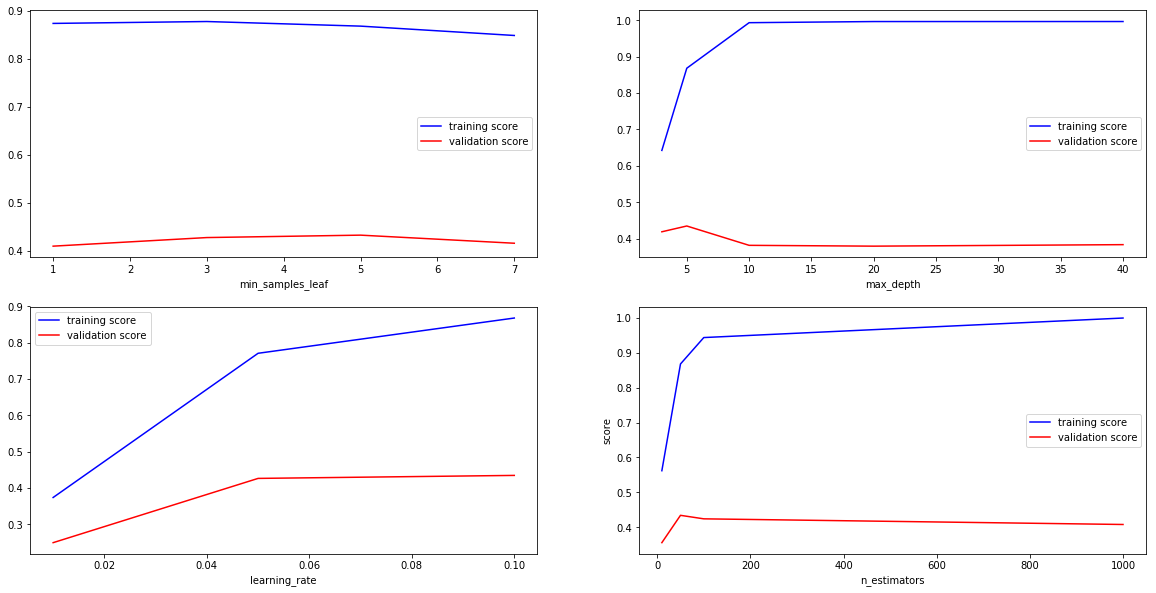

In [300]:
fig, ax = plt.subplots(2,2, figsize=(20,10))
_ = ax[0,0].plot(params['min_samples_leaf'], np.median(train_score_leaf,1), color='b',label='training score')
_ = ax[0,0].plot(params['min_samples_leaf'], np.median(validation_score_leaf,1), color='r', label='validation score')
_ = ax[0,0].set_xlabel('min_samples_leaf'), plt.ylabel('score')
_ = ax[0,0].legend(loc='best')

_ = ax[0,1].plot(params['max_depth'], np.median(train_score_depth,1), color='b',label='training score')
_ = ax[0,1].plot(params['max_depth'], np.median(validation_score_depth,1), color='r', label='validation score')
_ = ax[0,1].set_xlabel('max_depth'), plt.ylabel('score')
_ = ax[0,1].legend(loc='best')

_ = ax[1,0].plot(params['learning_rate'], np.median(train_score_learn,1), color='b',label='training score')
_ = ax[1,0].plot(params['learning_rate'], np.median(validation_score_learn,1), color='r', label='validation score')
_ = ax[1,0].set_xlabel('learning_rate'), plt.ylabel('score')
_ = ax[1,0].legend(loc='best')

_ = ax[1,1].plot(params['n_estimators'], np.median(train_score_nest,1), color='b',label='training score')
_ = ax[1,1].plot(params['n_estimators'], np.median(validation_score_nest,1), color='r', label='validation score')
_ = ax[1,1].set_xlabel('n_estimators'), plt.ylabel('score')
_ = ax[1,1].legend(loc='best')

### Random Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [302]:
params = {'min_samples_leaf': [1,3,5,7],
          'max_depth': [3,5,10,20,40],
          'n_estimators': [10,50,100,1000]}

gscv = GridSearchCV(RandomForestRegressor(),params, cv=3, n_jobs=-1)

In [303]:
gscv.fit(X_train,y_train)

print('best params: ' + str(gscv.best_params_))
print('r2 score for best_params: ' + str(gscv.best_estimator_.score(X_train,y_train)))

best params: {'max_depth': 40, 'min_samples_leaf': 1, 'n_estimators': 100}
r2 score for best_params: 0.9220112832344508


In [304]:
train_score_leaf, validation_score_leaf = validation_curve(RandomForestRegressor(max_depth=40, 
                                                                            n_estimators=100),
                                                 X_train, y_train,
                                                 'min_samples_leaf',
                                                 params['min_samples_leaf'], cv=3)
train_score_depth, validation_score_depth = validation_curve(RandomForestRegressor(min_samples_leaf=1, 
                                                                            n_estimators=100),
                                                 X_train, y_train,
                                                 'max_depth',
                                                 params['max_depth'], cv=3)
train_score_nest, validation_score_nest = validation_curve(RandomForestRegressor(min_samples_leaf=1, max_depth=40),
                                                 X_train, y_train,
                                                 'n_estimators',
                                                 params['n_estimators'], cv=3)

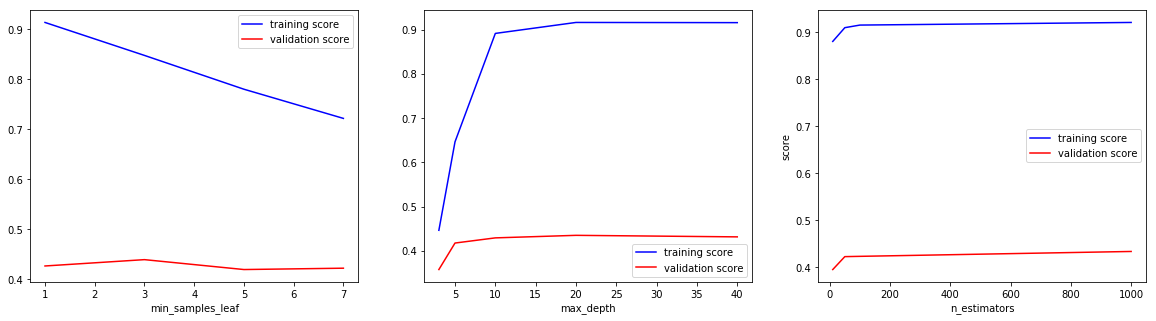

In [308]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
_ = ax[0].plot(params['min_samples_leaf'], np.median(train_score_leaf,1), color='b',label='training score')
_ = ax[0].plot(params['min_samples_leaf'], np.median(validation_score_leaf,1), color='r', label='validation score')
_ = ax[0].set_xlabel('min_samples_leaf'), plt.ylabel('score')
_ = ax[0].legend(loc='best')

_ = ax[1].plot(params['max_depth'], np.median(train_score_depth,1), color='b',label='training score')
_ = ax[1].plot(params['max_depth'], np.median(validation_score_depth,1), color='r', label='validation score')
_ = ax[1].set_xlabel('max_depth'), plt.ylabel('score')
_ = ax[1].legend(loc='best')

_ = ax[2].plot(params['n_estimators'], np.median(train_score_nest,1), color='b',label='training score')
_ = ax[2].plot(params['n_estimators'], np.median(validation_score_nest,1), color='r', label='validation score')
_ = ax[2].set_xlabel('n_estimators'), plt.ylabel('score')
_ = ax[2].legend(loc='best')

### Elastic-Net Regression

In [529]:
from sklearn.linear_model import ElasticNet
params = {'l1_ratio':[0, 0.01,.1,.5,.9,1], 
         'alpha': [0, 0.2, 0.5, 1]}
en = GridSearchCV(ElasticNet(), params, cv=3).fit(X_train, y_train)

In [530]:
en.fit(X_train,y_train)

print('best params: ' + str(en.best_params_))
print('r2 score for best_params: ' + str(en.score(X_train,y_train)))

best params: {'alpha': 0, 'l1_ratio': 0}
r2 score for best_params: 0.4816927351299315


In [531]:
train_score_l1r, validation_score_l1r = validation_curve(ElasticNet(alpha=0),
                                                 X_train, y_train,
                                                 'l1_ratio',
                                                 [0, 0.01,.1,.5,.9,1], cv=3)

train_score_a, validation_score_a = validation_curve(ElasticNet(l1_ratio=0),
                                                 X_train, y_train,
                                                 'alpha',
                                                 [0, 0.2, 0.5, 1], cv=3)

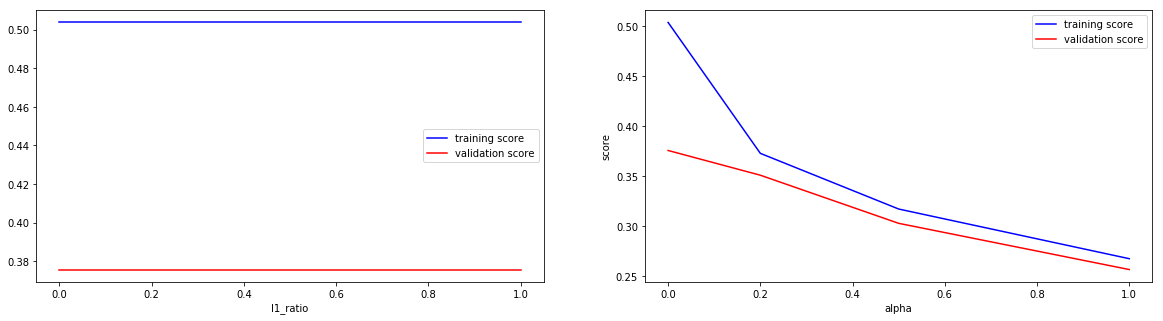

In [535]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
_ = ax[0].plot(params['l1_ratio'], np.median(train_score_l1r,1), color='b',label='training score')
_ = ax[0].plot(params['l1_ratio'], np.median(validation_score_l1r,1), color='r', label='validation score')
_ = ax[0].set_xlabel('l1_ratio'), plt.ylabel('score')
_ = ax[0].legend(loc='best')

_ = ax[1].plot(params['alpha'], np.median(train_score_a,1), color='b',label='training score')
_ = ax[1].plot(params['alpha'], np.median(validation_score_a,1), color='r', label='validation score')
_ = ax[1].set_xlabel('alpha'), plt.ylabel('score')
_ = ax[1].legend(loc='best')

### Winning Model - Random Forest Regressor

__Best Parameters__: max_depth: 40, min_samples_leaf: 1, n_estimators: 100

In [19]:
#Running the Model on the test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

rfr = RandomForestRegressor(max_depth=40, min_samples_leaf=1, n_estimators=100)
rfr.fit(X_train, y_train)
y_pred_test = rfr.predict(X_test)

In [20]:
print('r2 score for test_set: ' + str(r2_score(y_test, y_pred_test)))

r2 score for test_set: 0.5254458041442758


### Feature Importance

In [55]:
feature_importance = list(zip(data.drop('Followers', axis=1).columns[1:],rfr.feature_importances_))

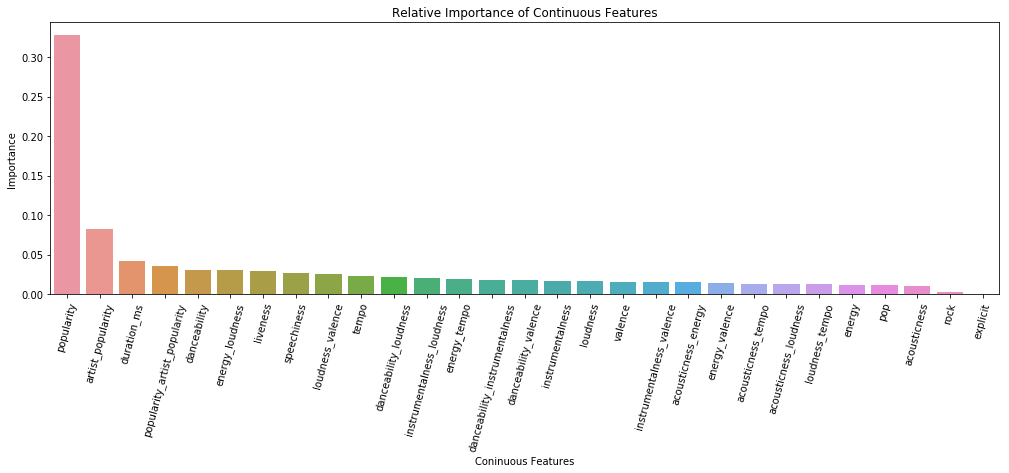

In [63]:
_ = plt.figure(figsize=(17,5))
_ = sns.barplot(x=[item[0] for item in (sorted(feature_importance[0:15]+feature_importance[-14:],key=lambda x:x[1], reverse=True))], 
                y = [item[1] for item in (sorted(feature_importance[0:15]+feature_importance[-14:],key=lambda x:x[1], reverse=True))])
_ = plt.xlabel('Coninuous Features')
_ = plt.ylabel('Importance')
_ = plt.title('Relative Importance of Continuous Features')
plt.xticks(rotation=75);

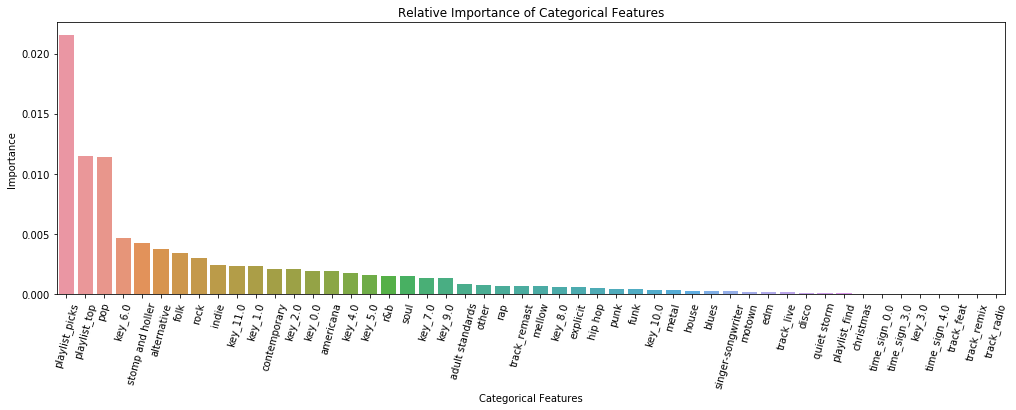

In [66]:
_ = plt.figure(figsize=(17,5))
_ = sns.barplot(x=[item[0] for item in sorted(feature_importance[12:-14],key=lambda x:x[1], reverse=True)], 
                y = [item[1] for item in sorted(feature_importance[12:-14],key=lambda x:x[1], reverse=True)])
_ = plt.xlabel('Categorical Features')
_ = plt.ylabel('Importance')
_ = plt.title('Relative Importance of Categorical Features')
plt.xticks(rotation=75);